Question 1 : Changing Greyscale Levels

In [88]:
import cv2
from IPython.display import display
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

In [84]:
img = cv2.imread("/home/mathangi/Desktop/hotairballoon.png",1)

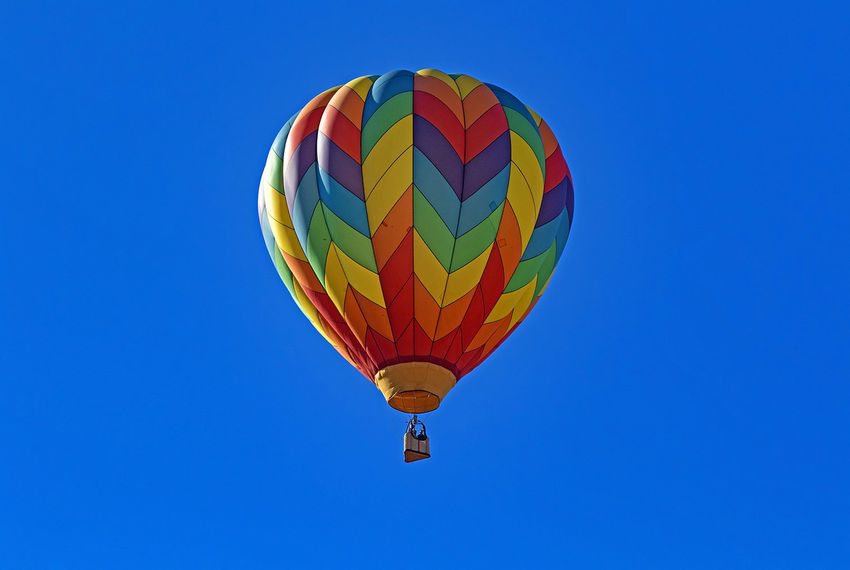

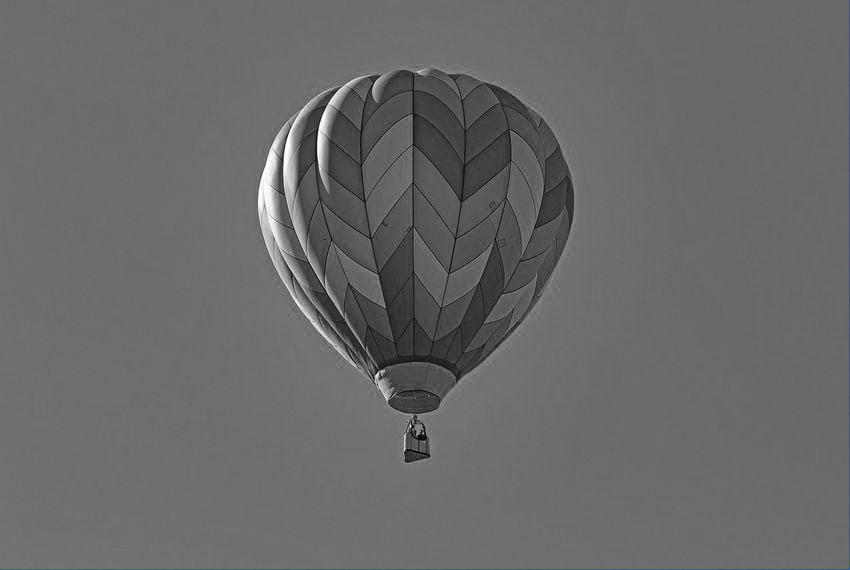

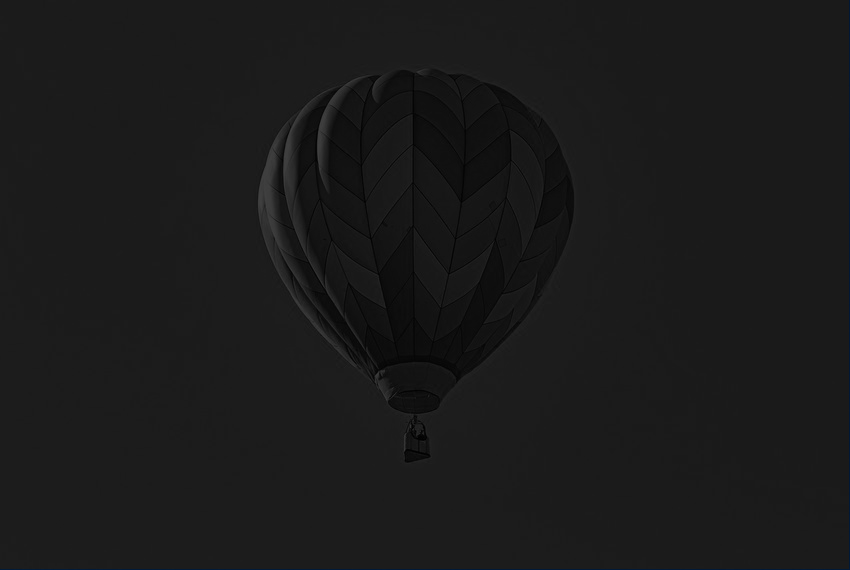

In [82]:
#function to change grey level
def changelevel(img,level):
    val = pow(2,8-level)
    img = img/val
    return img

#Averaging to convert image to greyscale
for i in range(0,img.shape[0]-1):
    for j in range(0,img.shape[1]-1):
        value = img[i,j]
        img[i,j] = (int(value[0]) + int(value[1]) + int(value[2]))/3
        
res = changelevel(img,6)

cv2.imwrite('greylevel.png',res)
cv2.imwrite('grey.png',img)
display(Image.open("/home/mathangi/Desktop/hotairballoon.png"))
display(Image.open("grey.png"))
display(Image.open("greylevel.png"))

Question 2 : Zooming and Shrinking

Zooming with nearest neighbour interpolation 


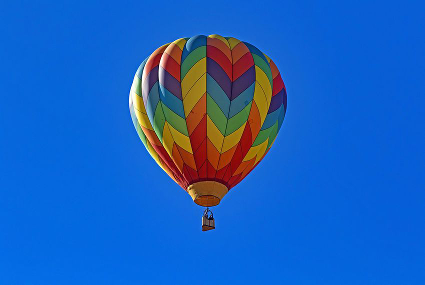

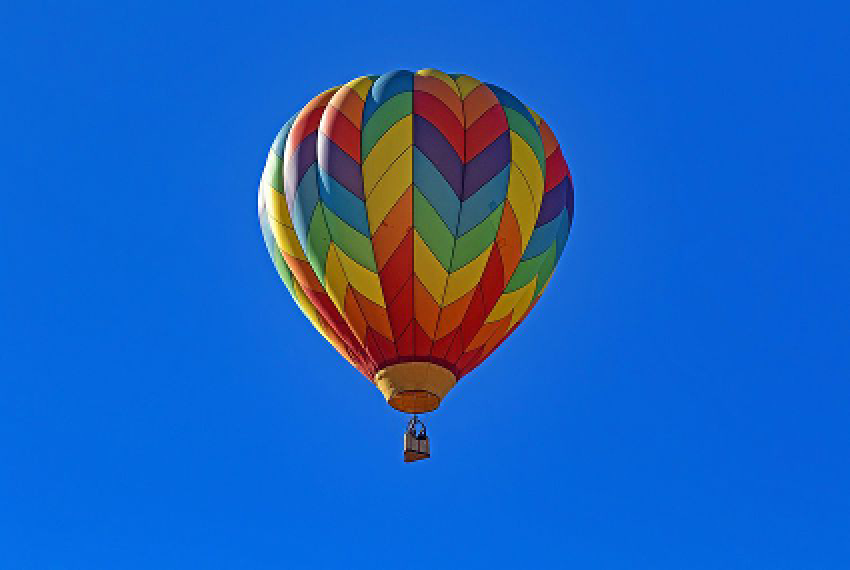



Zooming with bilinear interpolation 


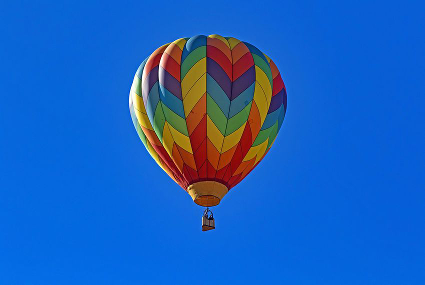

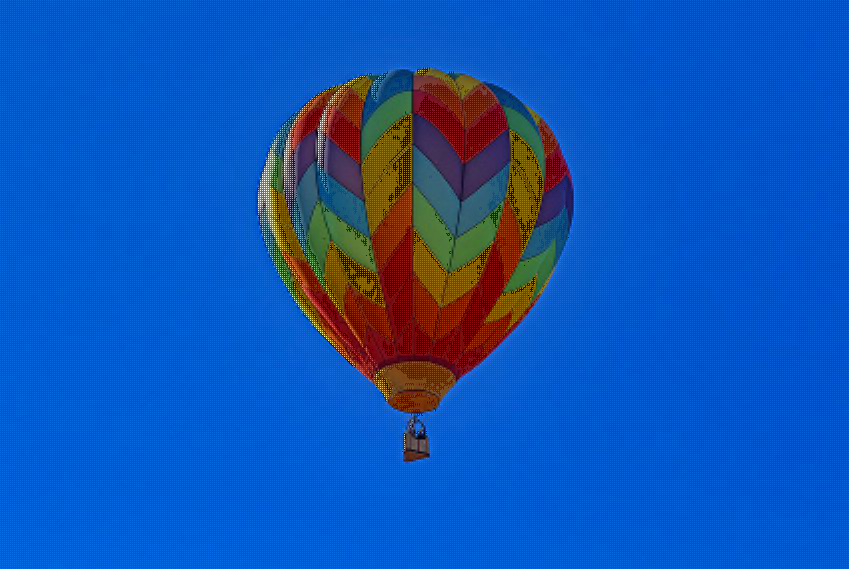



Shrinking an image


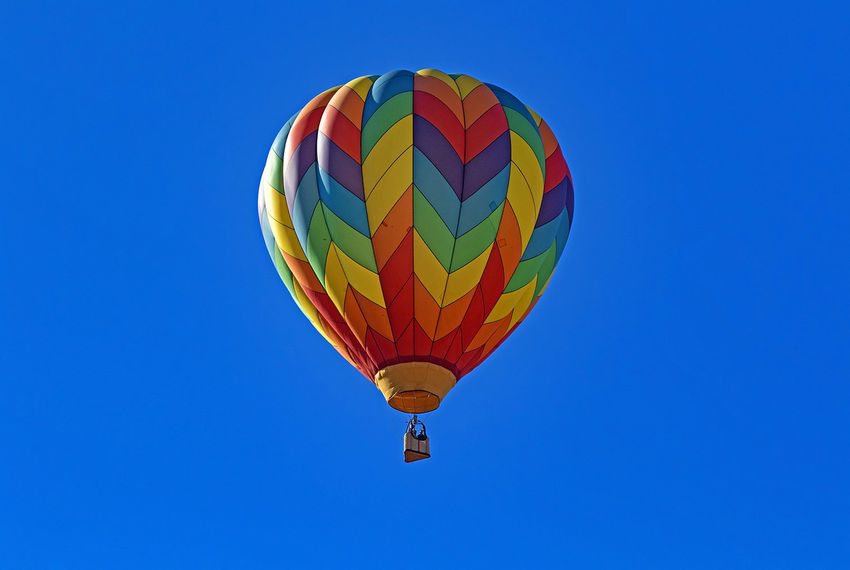

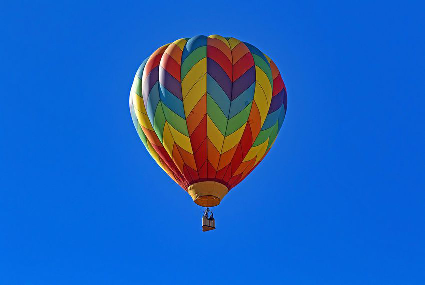

In [85]:
img1 = cv2.imread("/home/mathangi/resize.png",1)

#nearest neighbour interpolation (NNI)
def nni(img):
    zoom = np.zeros((img.shape[0]*2,img.shape[1]*2,3), np.uint8)
    zci = 0
    zcj = 0
    for i in range (0,img.shape[0]):
        for j in range (0,img.shape[1]):
            zoom[zci,zcj] = zoom[zci,zcj+1] = img[i,j]
            zoom[zci+1,zcj] = zoom[zci+1,zcj+1] = img[i,j]
            zcj = zcj + 2
        zcj = 0
        zci = zci + 2
    return zoom

zoom = nni(img1)

cv2.imwrite('nni.png',zoom)
print("Zooming with nearest neighbour interpolation ")
display(Image.open("/home/mathangi/resize.png"))
display(Image.open("nni.png"))

#bilinear interpolation (BLI)

def bli(img):
    zoom = np.zeros((img.shape[0]*2-1,img.shape[1]*2-1,3), np.uint8)
    imgi = 0
    imgj = 0
    for i in range (0,zoom.shape[0]):
        for j in range (0,zoom.shape[1]):
            if i%2 == 0 and j%2 == 0:
                zoom[i,j] = img[imgi,imgj]
                imgj = imgj+1
        if i%2 == 0:
            imgj = 0
            imgi = imgi+1
    for i in range (0,zoom.shape[0]):
        for j in range (0,zoom.shape[1]):
            if i%2 == 0 and j%2 != 0:
                zoom[i,j] = (zoom[i,j-1]+zoom[i,j+1])/2
            if i%2 !=0 and j%2 == 0:
                zoom[i,j] = (zoom[i-1,j]+zoom[i+1,j])/2
    for i in range (0,zoom.shape[0]):
        for j in range (0,zoom.shape[1]):
            if i%2 != 0 and j%2 != 0:
                zoom[i,j] = (zoom[i-1,j]+zoom[i+1,j])/2
    return zoom

zoom = bli(img1)

cv2.imwrite('bli.png',zoom)
print("\n")
print("Zooming with bilinear interpolation ")
display(Image.open("/home/mathangi/resize.png"))
display(Image.open("bli.png"))

#shrinking a zoomed image

def shrink(img):
    shk = np.zeros((round(img.shape[0]/2),round(img.shape[1]/2),3), np.uint8)
    zci = 0
    zcj = 0
    for i in range (0,shk.shape[0]):
        for j in range (0,shk.shape[1]):
            shk[i,j] = img[zci,zcj]
            zcj = zcj + 2
        zcj = 0
        zci = zci + 2
    return shk

shk = shrink(img)

cv2.imwrite('shrink.png',shk)
print("\n")
print("Shrinking an image")
display(Image.open("/home/mathangi/Desktop/hotairballoon.png"))
display(Image.open("shrink.png"))


Question 3 : Histogram Equalization

148


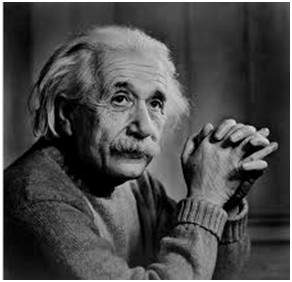

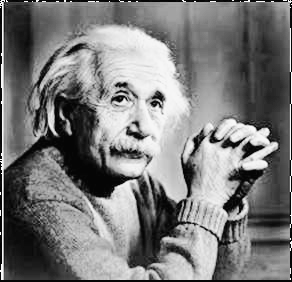

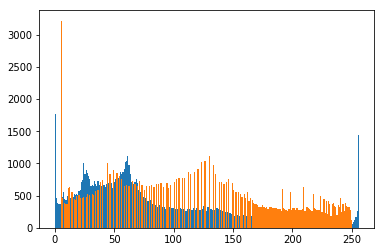

In [195]:
import math
img = cv2.imread("lowcontrast.png",0)
plt.hist(img.ravel(),256,[0,256])

#Function to compute frequency value of each intensity level
def histogram(img):
    index = 0
    for i in range(0,img.shape[0]):
        for j in range(0,img.shape[1]):
            val = float(img[i,j])
            found = 0
            for s in range (0,index):
                if hist[s][0] == val:
                    hist[s][1] = hist[s][1] + 1
                    found = 1
            if found == 0:
                hist[index][0] = val   
                hist[index][1] = 1
                index = index + 1
    hist.sort()
    p = img.shape[0]*img.shape[1]
    #calculating PMF,CDF,CDF*(255-1)
    for i in range (0,index):
        hist[i][2] = hist[i][1]/p
        if i == 0:
            hist[i][3] = hist[i][2]
        else:
            hist[i][3] = hist[i][2] + hist[i-1][3]
        hist[i][4] = hist[i][3] * 255
        hist[i][5] = math.floor(hist[i][4])
    return hist

hist = histogram(img)

def histtransform(img,hist):
    img1 = img
    for i in range(0,img1.shape[0]):
        for j in range(0,img1.shape[1]):
            val = int(img1[i,j])
            for s in range (0,len(hist)):
                if val == hist[s][0]:
                    img1[i,j] = hist[s][5]
    return img1

heq = histtransform(img,hist)
plt.hist(heq.ravel(),256,[0,256])
cv2.imwrite("heq.png",heq)

display(Image.open("/home/mathangi/lowcontrast.png"))
display(Image.open("heq.png"))


Question 4 : Gamma Correction

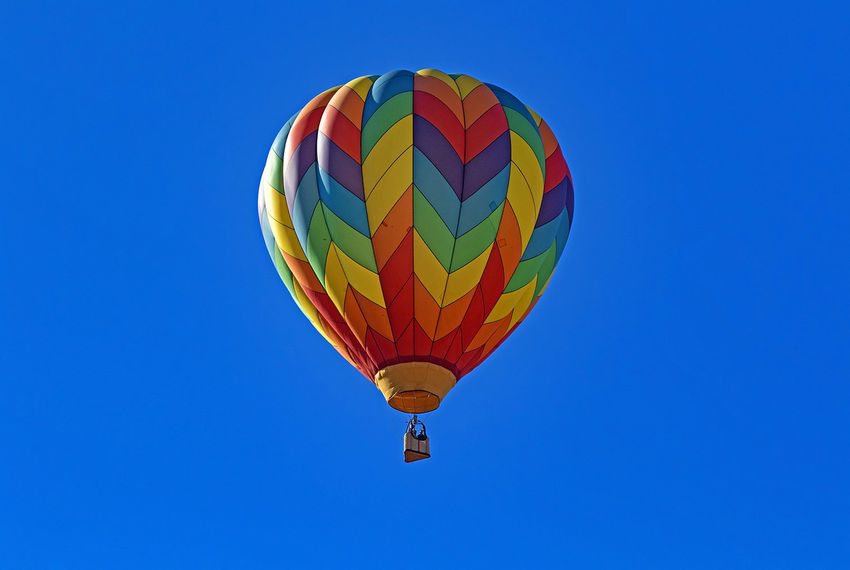

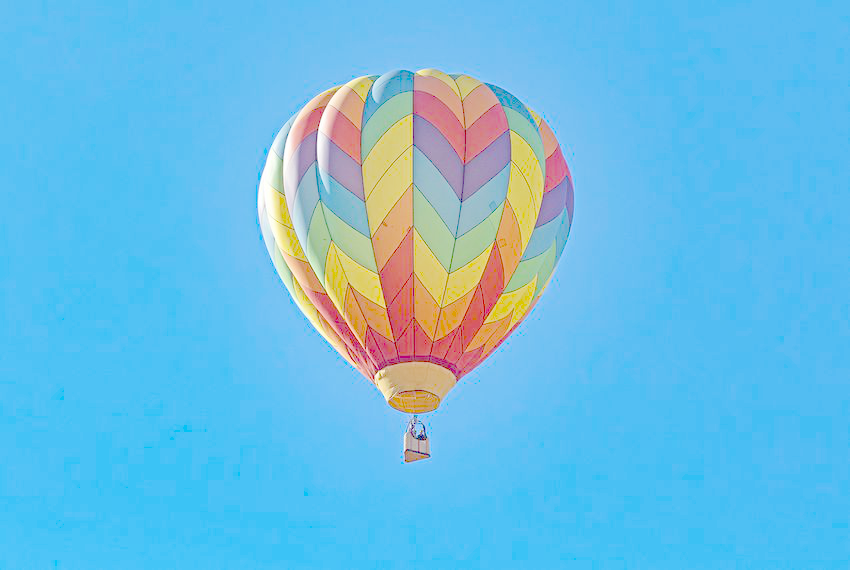

In [159]:
img = cv2.imread(r'/home/mathangi/Desktop/hotairballoon.png', 1)

#Function to compute gamma corrected image for a given gamma
def gamma(img, correction):
    img = img/255.0
    img = cv2.pow(img, correction)
    return np.uint8(img*255)

gammares = gamma(img, 0.3)

cv2.imwrite('gamma.png',gammares)
display(Image.open("/home/mathangi/Desktop/hotairballoon.png"))
display(Image.open("gamma.png"))

Question 5 : Laplacian Edge Detection

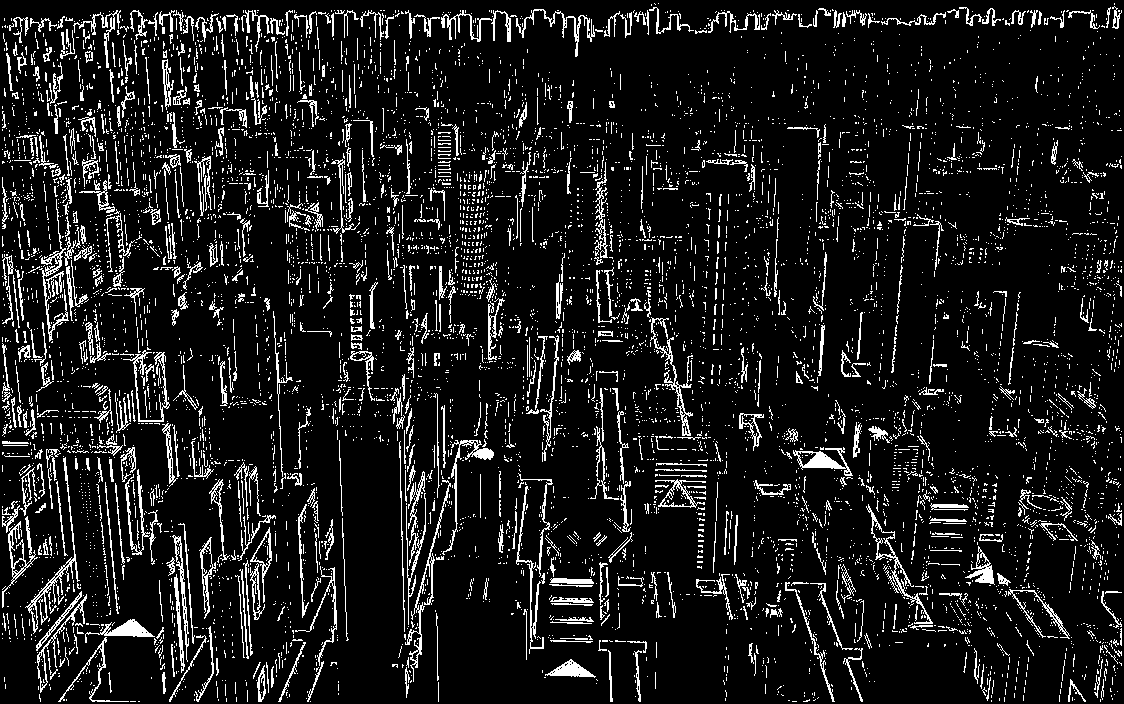

In [262]:
img = cv2.imread('/home/mathangi/edgedetection.png',0)
fil = [[0,0,-1/16,0,0],[0,-1/16,2/16,-1/16,0],[-1/16,-2/16,16/16,-2/16,-1/16],[0,-1/16,2/16,-1/16,0],[0,0,-1/16,0,0]]

#function for padding 
def padding(img):
    imgi = imgj = 0
    pimg = np.zeros((img.shape[0]+4,img.shape[1]+4,3), np.uint8)
    for i in range (2,pimg.shape[0]-2):
        for j in range (2,pimg.shape[1]-2):
            pimg[i,j] = img[imgi,imgj]
            imgj = imgj + 1
        imgi = imgi + 1
        imgj = 0
    pimg = cv2.cvtColor(pimg, cv2.COLOR_BGR2GRAY)
    return pimg
    
pimg = padding(img)

#function to apply filter
def lapedge(img,fil):
    edgeimg = np.zeros((img.shape[0],img.shape[1],3), np.uint8)
    edgeimg = cv2.cvtColor(edgeimg, cv2.COLOR_BGR2GRAY)
    for i in range (2,edgeimg.shape[0]-2):
        for j in range (2,edgeimg.shape[1]-2):
            s = 0
            for k in range(-2,3):
                for l in range(-2,3):
                    val = img[i+k,j+l]
                    f = fil[2+k][2+l]
                    s = s + (val*f)
            edgeimg[i,j] = int(s)
    for i in range (0,edgeimg.shape[0]):
        for j in range (0,edgeimg.shape[1]):
            val = edgeimg[i,j]
            if val <= 120:
                edgeimg[i,j] = 0
            else:
                edgeimg[i,j] = 255
    return edgeimg
            
edgeimg = lapedge(pimg,fil)

cv2.imwrite("lapedge.png", edgeimg)
    
display(Image.open("lapedge.png"))               